# CIE_4140_Lecture_2_2_Python #

## Vibration of 1 DOF system without damping under harmonic excitation ##

In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
t, omega_0, F_0, m, omega = sp.symbols('t, omega_0, F_0, m, omega',real=True,positive=True)
u_0, v_0 = sp.symbols('u_0, v_0')

Equation of motion

In [3]:
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+omega_0 **2 * u(t),F_0*sp.cos(omega*t)/m)
display(Equation_of_Motion)

Eq(omega_0**2*u(t) + Derivative(u(t), (t, 2)), F_0*cos(omega*t)/m)

Solution of the equation of motion with inital displacement $x_0$ and initial velocity $v_0$

In [4]:
u_sol = sp.dsolve(Equation_of_Motion, u(t), ics={u(0): u_0 , u(t).diff(t , 1).subs(t , 0) : v_0}).rhs
display(u_sol)

-F_0*cos(omega*t)/(m*(omega**2 - omega_0**2)) + (F_0 + m*omega**2*u_0 - m*omega_0**2*u_0)*cos(omega_0*t)/(m*omega**2 - m*omega_0**2) + v_0*sin(omega_0*t)/omega_0

The phenomenon of beating

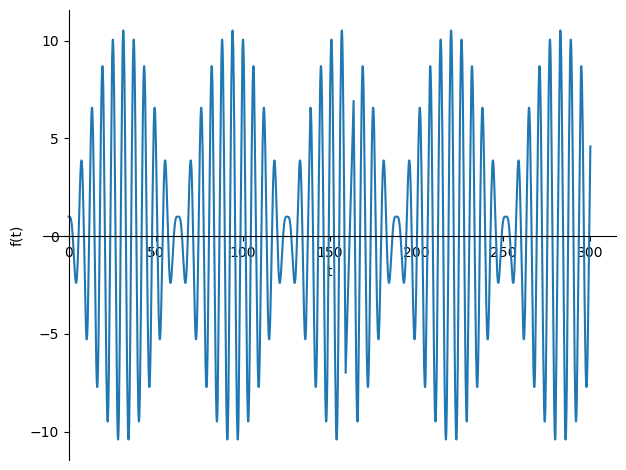

In [5]:
sp.plot(u_sol.subs([(u_0,1),(v_0,0),(F_0,1),(m,1),(omega_0,1),(omega,1.1)]),(t,0,300));

In [6]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [8]:
u_func = sp.lambdify((u_0,v_0,F_0,m,omega_0,omega,t),u_sol)

In [9]:
fig, ax = plt.subplots()
tdata = np.linspace(0,300,500)
line, = ax.plot([], [])
ax.set_xlim(0, 300)
ax.set_ylim(-10, 10)

def update(frame):
    ydata = u_func(u_0=1,v_0=0,F_0=1,m=1,omega_0=1,omega=frame,t=tdata)
    ax.set_title("Displacement versus time for $\omega$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(1.1,1.6,100),interval = 100)
plt.show()

<IPython.core.display.Javascript object>

## Forced Vibration of 1 DOF system without damping under harmonic excitation ##

Equation of motion

In [10]:
display(Equation_of_Motion)

Eq(omega_0**2*u(t) + Derivative(u(t), (t, 2)), F_0*cos(omega*t)/m)

The steady-state solution should be sought for in the form $x(t) = Xcos(\omega*t)$
The equation with respect to the amplitude of the steady-state vibration:


In [11]:
U = sp.symbols('U')
Equation_for_amplitude_of_u_steady = sp.simplify(Equation_of_Motion.subs(u(t), U*sp.cos(omega*t)))
Equation_for_amplitude_of_u_steady = sp.Eq(Equation_for_amplitude_of_u_steady.lhs * m / sp.cos(omega*t),
                                           Equation_for_amplitude_of_u_steady.rhs * m / sp.cos(omega*t))
display(sp.simplify(Equation_for_amplitude_of_u_steady))

Eq(F_0, U*m*(-omega**2 + omega_0**2))

Amplitude of the steady-state vibration

In [12]:
U_steady = sp.solve(Equation_for_amplitude_of_u_steady, U)[0]
display(U_steady)

-F_0/(m*(omega**2 - omega_0**2))

Frequency dependence of the amplitude:

In [13]:
sp.plot(U_steady.subs([(F_0,1),(m,1),(omega_0,1)]), (omega , 0 , 3), ylim = [-5 , 5]);

<IPython.core.display.Javascript object>

## Development of resonance in time ##

Equation of Motion

In [14]:
display(Equation_of_Motion)

Eq(omega_0**2*u(t) + Derivative(u(t), (t, 2)), F_0*cos(omega*t)/m)

Solution of the equation of motion with inital displacement $x_0$ and initial velocity $v_0$

In [15]:
u_sol = sp.dsolve(Equation_of_Motion, u(t), ics={u(0): u_0 , u(t).diff(t , 1).subs(t , 0) : v_0}).rhs
display(u_sol)

-F_0*cos(omega*t)/(m*(omega**2 - omega_0**2)) + (F_0 + m*omega**2*u_0 - m*omega_0**2*u_0)*cos(omega_0*t)/(m*omega**2 - m*omega_0**2) + v_0*sin(omega_0*t)/omega_0

Development of resonance from zero initial conditions

In [16]:
displacement_in_resonance = sp.limit(u_sol.subs([(u_0,0),(v_0,0)]),omega_0,omega)
display(displacement_in_resonance)

F_0*t*sin(omega*t)/(2*m*omega)

In [17]:
sp.plot(displacement_in_resonance.subs([(F_0,1),(m,1),(omega,1)]), (t , 0 , 50));

<IPython.core.display.Javascript object>

In [18]:
displacement_in_resonance_func = sp.lambdify((F_0,m,omega,t),displacement_in_resonance)

In [19]:
fig, ax = plt.subplots()
tdata = np.linspace(0,50,500)
line, = ax.plot([], [])
ax.set_xlim(0, 50)
ax.set_ylim(-50, 50)

def update(frame):
    ydata = displacement_in_resonance_func(F_0=1, m=1, omega = frame, t = tdata)
    ax.set_title("resonance development at different frequencies for $\omega$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.5,1.5,100),interval = 100)
plt.show()

<IPython.core.display.Javascript object>

# Variation of the energy in time #

In [20]:
Energy =m/2*sp.diff(u_sol,t)**2 + m/2*omega_0**2*u_sol**2
display(Energy)

m*omega_0**2*(-F_0*cos(omega*t)/(m*(omega**2 - omega_0**2)) + (F_0 + m*omega**2*u_0 - m*omega_0**2*u_0)*cos(omega_0*t)/(m*omega**2 - m*omega_0**2) + v_0*sin(omega_0*t)/omega_0)**2/2 + m*(F_0*omega*sin(omega*t)/(m*(omega**2 - omega_0**2)) - omega_0*(F_0 + m*omega**2*u_0 - m*omega_0**2*u_0)*sin(omega_0*t)/(m*omega**2 - m*omega_0**2) + v_0*cos(omega_0*t))**2/2

In [21]:
sp.plot(Energy.subs([(u_0,1),(v_0,0),(F_0,1),(m,1),(omega_0,1),(omega,1.1)]), (t , 0 , 300));

<IPython.core.display.Javascript object>

In [22]:
Energy_func = sp.lambdify((u_0,v_0,F_0,m,omega_0,omega,t),Energy)

In [23]:
fig, ax = plt.subplots()
tdata = np.linspace(0,300,500)
line, = ax.plot([], [])
ax.set_xlim(0, 300)
ax.set_ylim(0, 60)

def update(frame):
    ydata = Energy_func(u_0=1,v_0=0,F_0=1,m=1,omega=frame,omega_0=1,t=tdata)
    ax.set_title("Energy versus time for $\omega$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(1.1,1.6,100),interval = 100)
plt.show()

<IPython.core.display.Javascript object>